In [1]:
# RGB 이미지 -->  Grayscale 이미지


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   # MatPlotlibIMaGe

img = mpimg.imread('Pineapple\\0_100.jpg')

print(type(img))
print(img.shape)

# (100, 100, 3)
# 100 <-- 이미지의 높이
# 100 <-- 이미지의 너비
# 3   <-- RGB 이미지 : Red, Green, Blue 3개의 채널 (channel)

<class 'numpy.ndarray'>
(100, 100, 3)


In [2]:
R, G, B = img[:, :, 0],  img[:, :, 1], img[:, :, 2]
imgGray = 0.299 * R + 0.587 * G + 0.114 * B

# 0 ~ 255까지 총 256개의 밝기 정보를 정숫값으로 표현!
imgGray = np.array(imgGray, dtype = 'int')

print(imgGray.shape)
print(imgGray[50,:])

(100, 100)
[254 252 254 254 255 254 253 253 140 114  96  64  59  52  48  53  47  50
  58  52  48  51  61  62  45  43  71 113 145 116  40  46  52  53  54  67
  62  53  45  36  41  55  56  91  67  45  45  40  78  78  65  78  88  86
  95 114 151 133  80  53  56  67  83  70  48  38  35  37  76  45  44  44
  54  60  55  54  55  50  48  46  41  36  41  39  37  47  56  55  55  60
 115 254 253 254 255 253 255 255 255 255]


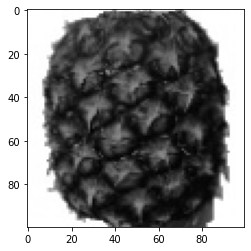

In [3]:
plt.imshow(imgGray, cmap='gray')  # imshow, cmap = color map
plt.show()

In [4]:
# 0: 검정색, 255: 흰색   
# 0~255 정숫값  <-- 곱하기, 더하기

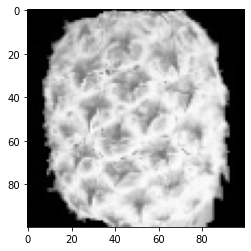

In [5]:
imgGray2 = 255 - imgGray

plt.imshow(imgGray2, cmap='gray')
plt.show()

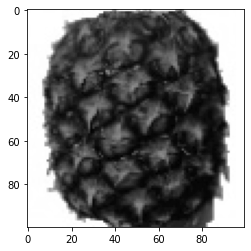

In [6]:
plt.imshow(imgGray2, cmap='gray_r')
plt.show()

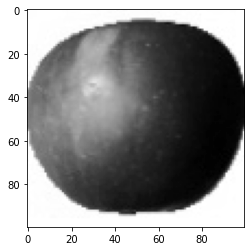

In [7]:
img = mpimg.imread('Apple\\0_100.jpg')

R, G, B = img[:, :, 0],  img[:, :, 1], img[:, :, 2]
imgGray = 0.299 * R + 0.587 * G + 0.114 * B
imgGray = np.array(imgGray, dtype = 'int')
imgGray_apple = 255 - imgGray

plt.imshow(imgGray_apple, cmap='gray_r')
plt.show()

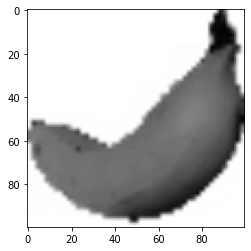

In [8]:
img = mpimg.imread('Banana\\0_100.jpg')

R, G, B = img[:, :, 0],  img[:, :, 1], img[:, :, 2]
imgGray = 0.299 * R + 0.587 * G + 0.114 * B

# 0 ~ 255까지 총 256개의 밝기 정보를 정숫값으로 표현!
imgGray = np.array(imgGray, dtype = 'int')
imgGray_banana = 255 - imgGray

plt.imshow(imgGray_banana, cmap='gray_r')
plt.show()

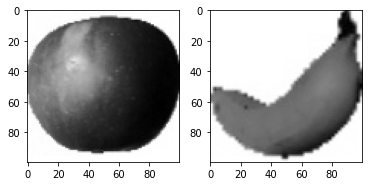

In [9]:
# subplots() 함수
# 한 셀에서 여러 이미지 출력가능

fig, axs = plt.subplots(1, 2)

axs[0].imshow(imgGray_apple, cmap='gray_r')
axs[1].imshow(imgGray_banana, cmap='gray_r')
plt.show()

In [29]:
import os

cur_dir = os.getcwd()

fruit_list = ['Apple','Banana','Pineapple']

fruit_npy = []
for fruit_name in fruit_list:
    folder_name = cur_dir + '\\' + fruit_name
    file_list = os.listdir(folder_name)
        
    for file_name in file_list:
        img = mpimg.imread(folder_name + '\\' + file_name)
        
        R, G, B =img[:,:,0], img[:, :, 1], img[:, :, 2]
        imgGray = 0.299 * R + 0.587 * G + 0.114 * B
        imgGray = np.array(imgGray, dtype = 'int')
        imgGray2 = 255 - imgGray
        
        fruit_npy.append(imgGray2)
        

fruit_npy = np.array(fruit_npy)
print(fruit_npy.shape)


(1470, 100, 100)


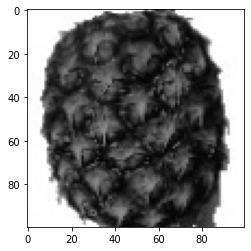

In [30]:
plt.imshow(fruit_npy[1000, :, :], cmap='gray_r')
plt.show()

In [32]:
np.save('fruits.npy', fruit_npy)  # Numpy

In [34]:
fruits = np.load('fruits.npy')   # 적재하다.

print(fruits.shape)

(1470, 100, 100)


In [37]:
apple = fruits[0:490].reshape(-1, 100 * 100)  # 1행에 10000열  # -1 을 넣으면 알아서 크기를 맞춤 
banana = fruits[490:980].reshape(-1, 100 * 100)
pineapple = fruits[980:].reshape(-1, 100 * 100)

In [38]:
print('사과 배열의 크기:', apple.shape)
print('바나나 배여르이 크기:',banana.shape)
print('파인애플 배열의 크기:', pineapple.shape)

사과 배열의 크기: (490, 10000)
바나나 배여르이 크기: (490, 10000)
파인애플 배열의 크기: (490, 10000)


In [43]:
print(apple.mean(axis=1).shape)
print(apple.mean(axis=1)[0:10])

(490,)
[133.6748 151.9998 151.8302 151.7464 151.6402 151.4957 151.3911 154.8597
 154.5147 154.7252]


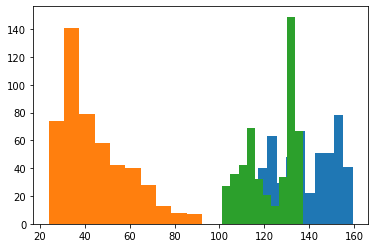

In [46]:
plt.figure()
plt.hist(apple.mean(axis=1))
plt.hist(banana.mean(axis=1))
plt.hist(pineapple.mean(axis=1))
plt.show()

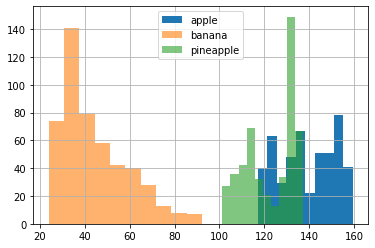

In [53]:
plt.figure()
plt.hist(apple.mean(axis=1), label = 'apple', alpha = 1)
plt.hist(banana.mean(axis=1),label = 'banana', alpha= 0.6)
plt.hist(pineapple.mean(axis=1), label='pineapple', alpha=0.6)
plt.grid(True)
plt.legend()
plt.show()

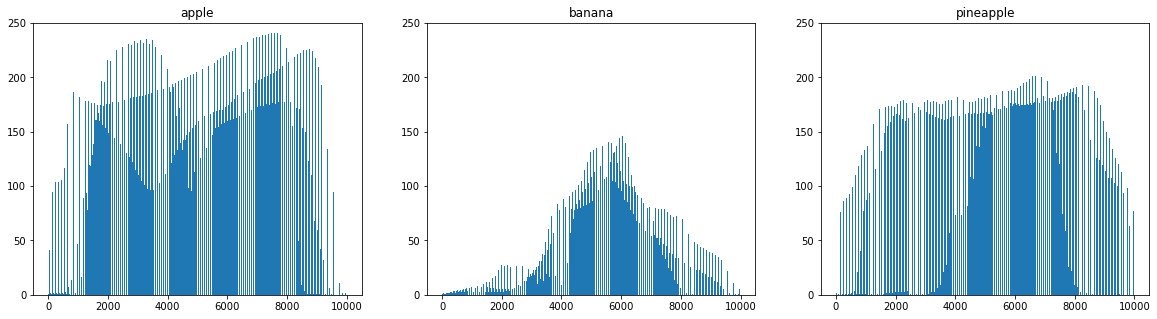

In [55]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))

axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), banana.mean(axis=0))
axs[2].bar(range(10000), pineapple.mean(axis=0))

axs[0].set_title('apple')
axs[1].set_title('banana')
axs[2].set_title('pineapple')

axs[0].set_ylim([0, 250])
axs[1].set_ylim([0, 250])
axs[2].set_ylim([0, 250])

plt.show()

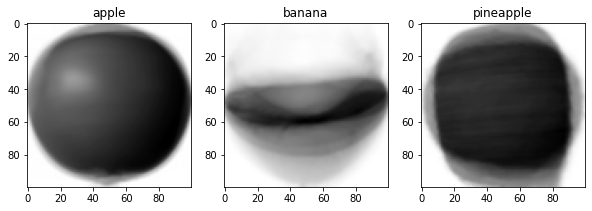

In [58]:
apple_mean = apple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)

fig , axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(banana_mean, cmap='gray_r')
axs[2].imshow(pineapple_mean, cmap='gray_r')


axs[0].set_title('apple')
axs[1].set_title('banana')
axs[2].set_title('pineapple')

plt.show()


In [62]:
abs_diff = np.abs(fruits - apple_mean)   # (1470, 100, 100) - (100, 100)
# difference : 차이
# 

abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(1470,)


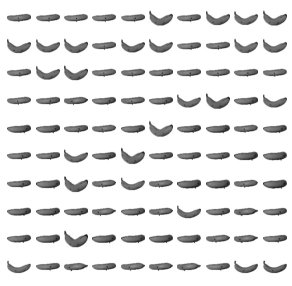

In [69]:
apple_index = np.argsort(abs_mean)[:100]   # arg sort

fig, axs = plt.subplots(10, 10, figsize = (5, 5))
for j in range(10):
    for k in range(10):
        axs[j, k].imshow(fruits[apple_index[j * 10 + k]], cmap = 'gray_r')
        axs[j, k].axis('off')

plt.show()

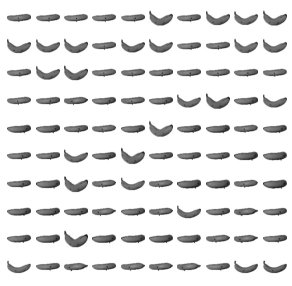

In [70]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
banana_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize = (5, 5))
for j in range(10):
    for k in range(10):
        axs[j, k].imshow(fruits[banana_index[j * 10 + k]], cmap = 'gray_r')
        axs[j, k].axis('off')

plt.show()


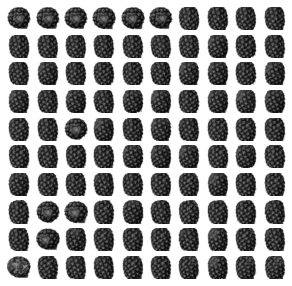

In [71]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
pineapple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize = (5, 5))
for j in range(10):
    for k in range(10):
        axs[j, k].imshow(fruits[pineapple_index[j * 10 + k]], cmap = 'gray_r')
        axs[j, k].axis('off')

plt.show()


In [ ]:
하다맘